In [349]:
###########DT##################
#credit
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from sklearn import random_projection
from scipy.linalg import pinv
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.random_projection import SparseRandomProjection, johnson_lindenstrauss_min_dim
from sklearn.random_projection import GaussianRandomProjection
import sklearn.datasets as dt
from sklearn.metrics.pairwise import euclidean_distances

In [350]:
#load data
df = pd.read_csv(r'./credit.csv')

In [351]:
# Cleaning data

df = df.drop('ID', axis=1)
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()
df = df.rename(columns={'PAY_0':'PAY_1'})
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0 
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
df = df.rename(columns={'default payment next month':'default'})
fil = (df.PAY_1 == 0) & (df.PAY_2 == 0) & (df.PAY_3 == 0) & (df.PAY_4 == 0) & (df.PAY_5 == 0) & (df.PAY_6 == 0) & (df.default ==1)
df.loc[fil,'default'] = 0
fil = (df.PAY_1 > 0) & (df.PAY_2 > 0) & (df.PAY_3 > 0) & (df.PAY_4 > 0) & (df.PAY_5 > 0) & (df.PAY_6 > 0) & (df.default ==0)
df.loc[fil,'default'] = 1


In [352]:
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
0,20000,2,2,1,24,2,2,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,2,1
2,90000,2,2,2,34,0,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,0,0
4,50000,1,2,1,57,0,0,0,0,0,0,0


In [353]:
y = df.pop('default')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

[10061.745987286222]
[10061.745987286222, 7510.894804920558]
[10061.745987286222, 7510.894804920558, 5085.100922213682]
[10061.745987286222, 7510.894804920558, 5085.100922213682, 4076.9628795326275]
[10061.745987286222, 7510.894804920558, 5085.100922213682, 4076.9628795326275, 3438.0671609190313]
[10061.745987286222, 7510.894804920558, 5085.100922213682, 4076.9628795326275, 3438.0671609190313, 2921.972360099631]
[10061.745987286222, 7510.894804920558, 5085.100922213682, 4076.9628795326275, 3438.0671609190313, 2921.972360099631, 2602.006321145311]
[10061.745987286222, 7510.894804920558, 5085.100922213682, 4076.9628795326275, 3438.0671609190313, 2921.972360099631, 2602.006321145311, 2330.623160217434]
[10061.745987286222, 7510.894804920558, 5085.100922213682, 4076.9628795326275, 3438.0671609190313, 2921.972360099631, 2602.006321145311, 2330.623160217434, 2146.4591372540385]
[10061.745987286222, 7510.894804920558, 5085.100922213682, 4076.9628795326275, 3438.0671609190313, 2921.97236009963

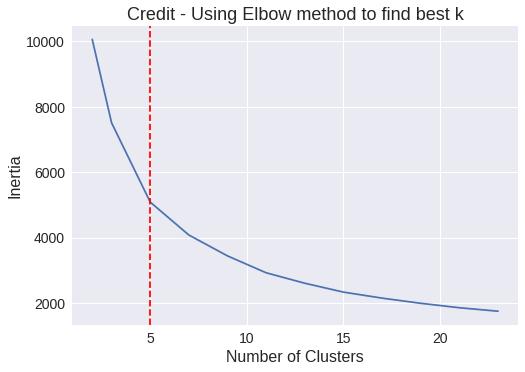

In [342]:
cluster_range = [2,3,5,7,9,11,13,15,17,19,21,23]
msd = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=1)
    c_labels = c.fit(X_train)
    msd.append(c.inertia_)
    print(msd)
plt.style.use('seaborn')
plt.plot([2,3,5,7,9,11,13,15,17,19,21,23],msd)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Credit - Using Elbow method to find best k', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

In [287]:
X_train.shape

(24000, 11)

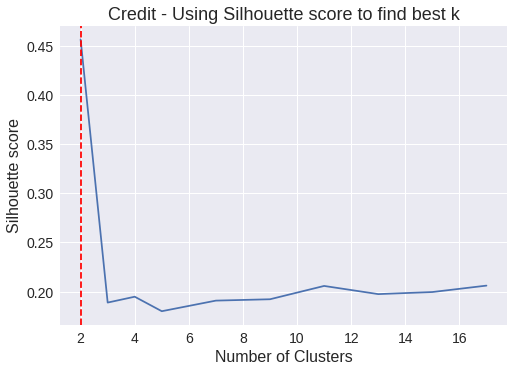

In [288]:
cluster_range = [2,3,4,5,7,9,11,13,15,17]
silhouette_list = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=10)
    c_labels = c.fit_predict(X_train)
    silhouette_list.append(silhouette_score(X_train, c_labels))
plt.style.use('seaborn')
plt.plot([2,3,4,5,7,9,11,13,15,17],silhouette_list)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Silhouette score', fontsize = 16)
plt.title('Credit - Using Silhouette score to find best k', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=2,color='r', linestyle='--')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4564047846623726
For n_clusters = 3 The average silhouette_score is : 0.18889581798631708
For n_clusters = 4 The average silhouette_score is : 0.1948544895009287
For n_clusters = 5 The average silhouette_score is : 0.18011671912432706
For n_clusters = 6 The average silhouette_score is : 0.18661408357773637


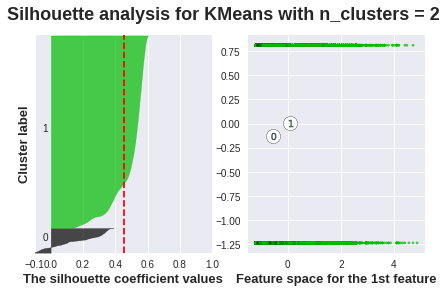

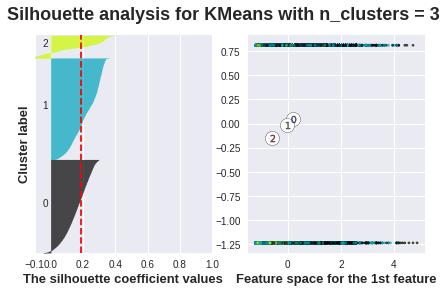

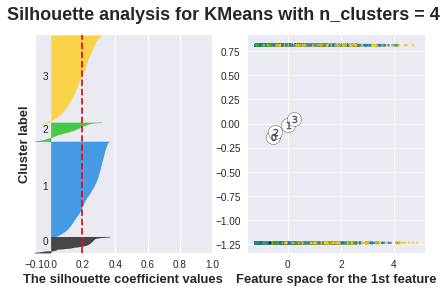

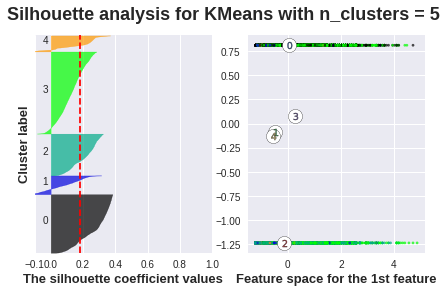

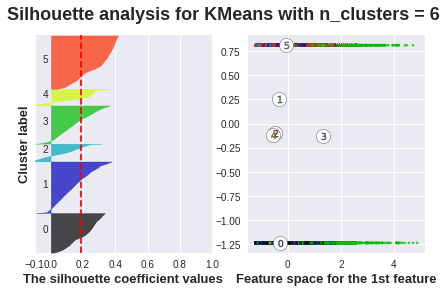

In [289]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(7, 4)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)

    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values",fontsize=13,fontweight='bold')
    ax1.set_ylabel("Cluster label",fontsize=13,fontweight='bold')

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train[:, 0], X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature",fontsize=13,fontweight='bold')

    plt.suptitle(("Silhouette analysis for KMeans "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=18, fontweight='bold')

plt.show()

In [354]:
cluster_range = [3,5,7,9,11,13,15,17,19]
#mean squared distance between each instance and its closest centroid. Also called inertia
bic_main = []
bic_by_cv = []
covariance_type = ['spherical', 'tied', 'diag', 'full']
for cv in covariance_type:
    for num_cluster in cluster_range:
        gmm = GaussianMixture(covariance_type = cv, n_components = num_cluster, n_init = 10, random_state=1)
        c_labels = gmm.fit(X_train)
        bic_by_cv.append(gmm.bic(X_train))
    bic_main.append(bic_by_cv)
    bic_by_cv = []

In [355]:
#covariance_type diag has the smallest bic
[min(i) for i in bic_main]

[462880.9001595906,
 325365.06820272777,
 -1316526.3028606903,
 -1312900.7825877252]

AIC for n_clusters(2): [-347497.72522487154]
BIC for n_clusters(2): [-347133.8638149517]
AIC for n_clusters(3): [-347497.72522487154, -539494.5399813734]
BIC for n_clusters(3): [-347133.8638149517, -538944.7049619389]
AIC for n_clusters(5): [-347497.72522487154, -539494.5399813734, -864999.2599649661]
BIC for n_clusters(5): [-347133.8638149517, -538944.7049619389, -864077.4777265025]
AIC for n_clusters(7): [-347497.72522487154, -539494.5399813734, -864999.2599649661, -906589.7150824375]
BIC for n_clusters(7): [-347133.8638149517, -538944.7049619389, -864077.4777265025, -905295.9856249447]
AIC for n_clusters(9): [-347497.72522487154, -539494.5399813734, -864999.2599649661, -906589.7150824375, -1003676.4466017153]
BIC for n_clusters(9): [-347133.8638149517, -538944.7049619389, -864077.4777265025, -905295.9856249447, -1002010.7699251933]
AIC for n_clusters(11): [-347497.72522487154, -539494.5399813734, -864999.2599649661, -906589.7150824375, -1003676.4466017153, -1144538.7444680058]
BIC f

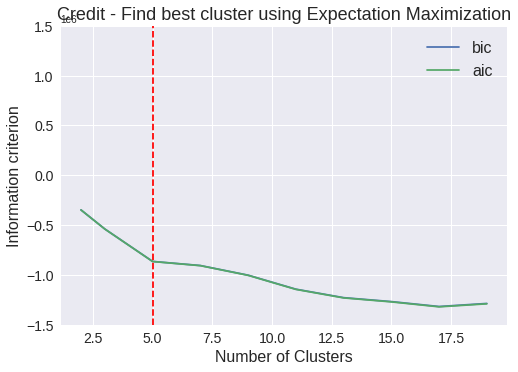

In [356]:
cluster_range = [2,3,5,7,9,11,13,15,17,19]
bic = []
aic = []
for num_cluster in cluster_range:
    gmm = GaussianMixture(covariance_type = 'diag', n_components = num_cluster, n_init = 10,random_state=1)
    c_labels = gmm.fit(X_train)
    bic.append(gmm.bic(X_train))
    aic.append(gmm.aic(X_train))
    print('AIC for n_clusters(%s): %s'%(num_cluster, aic))
    print('BIC for n_clusters(%s): %s'%(num_cluster, bic))
    
plt.style.use('seaborn')
plt.plot([2,3,5,7,9,11,13,15,17,19],bic,label = 'bic')
plt.plot([2,3,5,7,9,11,13,15,17,19],aic,label = 'aic')
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Information criterion', fontsize = 16)
plt.legend(fontsize=16)
plt.title('Credit - Find best cluster using Expectation Maximization', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim(-1500000,1500000)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

In [320]:
def convert_numarr_to_df (X_train,labels,features):
    #convert back X_train to df for visulaization
    rows = X_train.shape[0]
    #target = np.reshape(y_train.to_numpy(),(rows,1))
    labels = np.reshape(labels,(rows,1))
    X_train_vis = np.hstack((X_train,labels))
    features.append('class')
    #print(X_train_vis.shape)
    #print(features)
    df_vis = pd.DataFrame(data=X_train_vis,    # values
            #index=data[1:,0],    # 1st column as index
            columns=features)
    return df_vis


rows = X_train.shape[0]
y_train2 = y_train.to_numpy()
y_train2 = np.reshape(y_train2,(rows,1))
X_train_vis = np.hstack((X_train,y_train2))

columns = list(df.columns)
columns.append('y')
c = KMeans(n_clusters=5, random_state=10)
c_labels = c.fit_predict(X_train)
df_converted = convert_numarr_to_df(X_train_vis,c_labels,columns)

df_converted.groupby(['class','y']).count()

LIMIT_BAL   SEX  EDUCATION  MARRIAGE   AGE  PAY_1  PAY_2  PAY_3  \
class y                                                                      
0.0   0.0       6069  6069       6069      6069  6069   6069   6069   6069   
      1.0        402   402        402       402   402    402    402    402   
1.0   0.0       1034  1034       1034      1034  1034   1034   1034   1034   
      1.0       1036  1036       1036      1036  1036   1036   1036   1036   
2.0   0.0       4308  4308       4308      4308  4308   4308   4308   4308   
      1.0        309   309        309       309   309    309    309    309   
3.0   0.0       8469  8469       8469      8469  8469   8469   8469   8469   
      1.0        606   606        606       606   606    606    606    606   
4.0   0.0        336   336        336       336   336    336    336    336   
      1.0       1431  1431       1431      1431  1431   1431   1431   1431   

           PAY_4  PAY_5  PAY_6  
class y                         
0.0   0.0   6069   6069   6069  
      1.0    402    402    402  
1.0   0.0   1034   1034   1034  
      1.0   1036   1036   1036  
2.0   0.0   4308   4308   4308  
      1.0    309    309    309  
3.0   0.0   8469   8469   8469  
      1.0    606    606    606  
4.0   0.0    336    336    336  
      1.0   1431   1431   1431

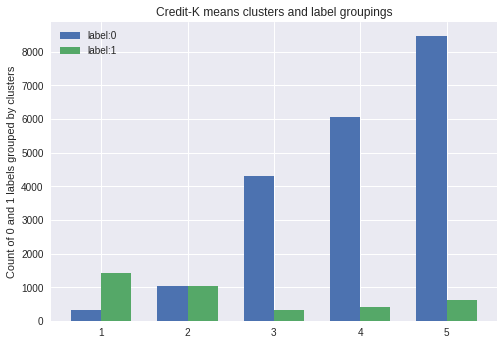

In [321]:
#credit-kmeans grouping
clusters = ['1', '2', '3','4','5']
zero_label = [336, 1034, 4308, 6069, 8469]
one_label = [1431, 1036, 309, 402, 606]

x = np.arange(len(clusters))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, zero_label, width, label='label:0')
rects2 = ax.bar(x + width/2, one_label, width, label='label:1')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of 0 and 1 labels grouped by clusters')
ax.set_title('Credit-K means clusters and label groupings')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

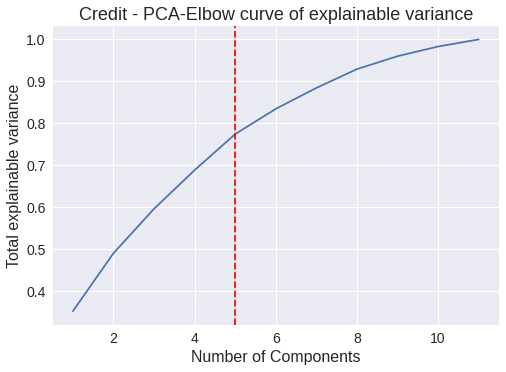

(24000, 9)

In [323]:
#PCA
n_features = X_train.shape[1]
total_explained_variance = []
pca = PCA(n_components = n_features, random_state = 42)
X_reduced = pca.fit_transform(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.style.use('seaborn')
plt.plot(range(1,n_features+1),cumsum)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Total explainable variance', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Credit - PCA-Elbow curve of explainable variance', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(20000,35000)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced.shape

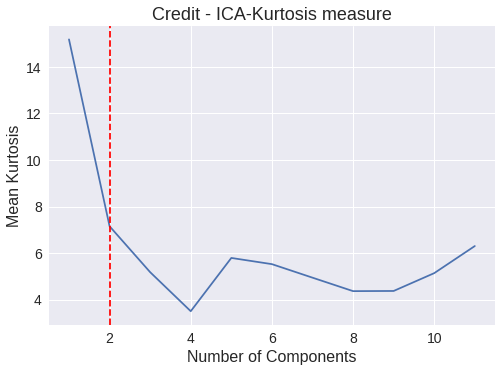

In [124]:
#ICA
n_features = X_train.shape[1]
total_explained_variance = []
kurtosis_avg = []
for feature in range(1,n_features+1):
    ica = FastICA(feature, random_state = 42,whiten = True)
    X_reduced = ica.fit_transform(X_train)
#     kurtosis_col_list = []
#     for col in range(X_reduced.shape[1]):
#         kurtosis_col_list.append(kurtosis(X_reduced[col]))
    kurtosis_avg.append(np.abs(np.mean(kurtosis(X_reduced))))

plt.style.use('seaborn')
plt.plot(range(1,n_features+1),kurtosis_avg)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Mean Kurtosis', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Credit - ICA-Kurtosis measure', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(20000,35000)
plt.axvline(x=2,color='r', linestyle='--')
plt.show()

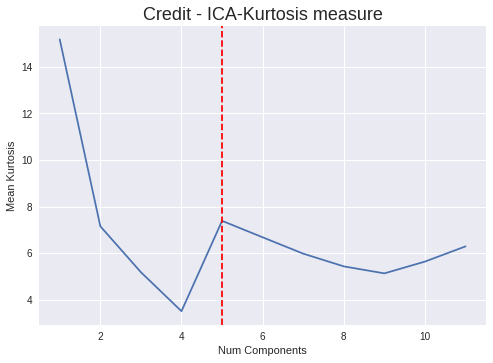

In [329]:
#ICA
n_features = X_train.shape[1]
ica_df = []
for i in range(1,n_features+1):
    ica = FastICA(i, max_iter=4000, whiten=True, tol=0.001)
    ica.fit(X_train)
    X_projected = ica.transform(X_train)
    reconstruction = np.dot(X_projected, ica.mixing_.T)
    loss = np.sum((X_train - reconstruction) ** 2)
    ica_df.append([i, np.mean(kurtosis(ica.transform(X_train))), loss])
ica_df = pd.DataFrame(ica_df, columns=["Num Components", "Mean Kurtosis", "Reconstruction Error"])
ica_df

sns.lineplot(data=ica_df, x="Num Components", y="Mean Kurtosis")
plt.title('Credit - ICA-Kurtosis measure', fontsize = 18)
plt.axvline(x=5,color='r', linestyle='--')



Text(0.5, 1.0, 'Credit - RandomProjection-Reconstruction error measure')

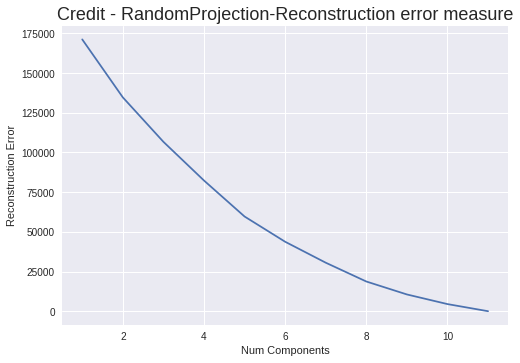

In [327]:
sns.lineplot(data=ica_df, x="Num Components", y="Reconstruction Error")
plt.title('Credit - RandomProjection-Reconstruction error measure', fontsize = 18)

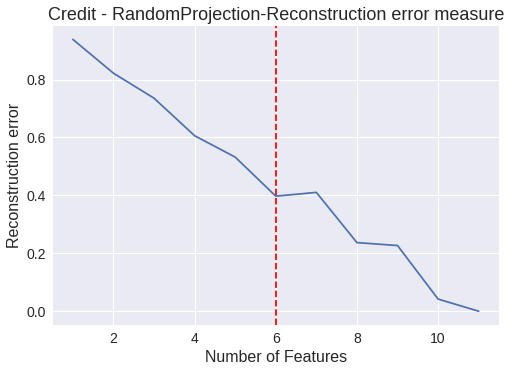

In [332]:
#randomized projection
n_features = X_train.shape[1]
error_list = []
for feature in range(1,n_features+1):
    transformer = random_projection.GaussianRandomProjection(n_components=feature)
    X_new = transformer.fit_transform(X_train)
    #Example:X_train = 5000*784
    #randomize projection with 30 components
    #if your components.T is [784,30], then taking the np.linalg.pinv
    #of that would give you [30,784]. then your Xinverse is dot product
    #of your reduced output [5000,30] and [30,784], giving you [5000,784].
    #then compare to your original dataset
    W = transformer.components_.T
    p = pinv(W)
    reconstructed_matrix = X_new.dot(p)
    error = np.mean(np.square(reconstructed_matrix-X_train))
    error_list.append(error)
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),error_list)
plt.xlabel('Number of Features', fontsize = 16)
plt.ylabel('Reconstruction error', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Credit - RandomProjection-Reconstruction error measure', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(20000,35000)
plt.axvline(x=6,color='r', linestyle='--')
plt.show()

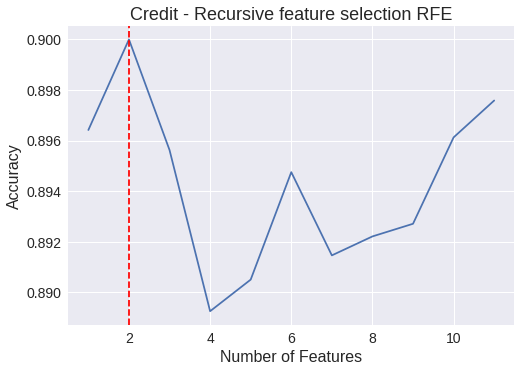

In [180]:
#recursive feature Elimination RFE
#dim reduction using labels
n_features = X_train.shape[1]
y_train=y_train.astype('int')
accuracy_list = []
kfold = StratifiedKFold(n_splits=3, random_state=42,shuffle = True)
for feature in range(1,n_features+1):
    selector = RFE(estimator=RandomForestClassifier(random_state=10), n_features_to_select=feature)
    selector = selector.fit(X_train, y_train)
    X_new = X_train[:,selector.support_]
    rf = RandomForestClassifier(random_state=10)
    mean_accuracy = np.mean(cross_val_score(rf, X_new, y_train, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise'))
    accuracy_list.append(mean_accuracy)
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),accuracy_list)
plt.xlabel('Number of Features', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Credit - Recursive feature selection RFE', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(0.75,0.81)
plt.axvline(x=2,color='r', linestyle='--')
plt.show()

In [361]:
#wine
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE

In [362]:
#load data
df = pd.read_csv(r'./wine.csv')

y = df.pop('class')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [363]:
df.head()

,alcohol,sugar,pH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16
4,9.4,1.9,3.51


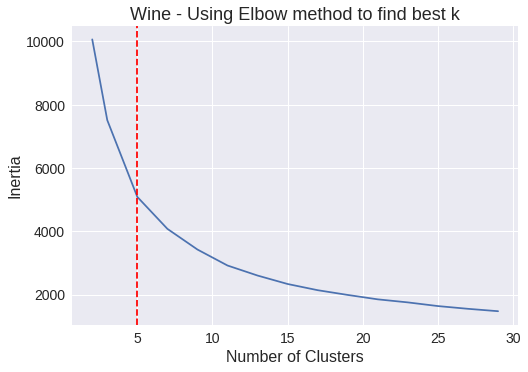

In [364]:
cluster_range = [2,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
#mean squared distance between each instance and its closest centroid. Also called inertia
msd = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=10)
    c_labels = c.fit(X_train)
    msd.append(c.inertia_)
plt.style.use('seaborn')
plt.plot([2,3,5,7,9,11,13,15,17,19,21,23,25,27,29],msd)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Wine - Using Elbow method to find best k', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

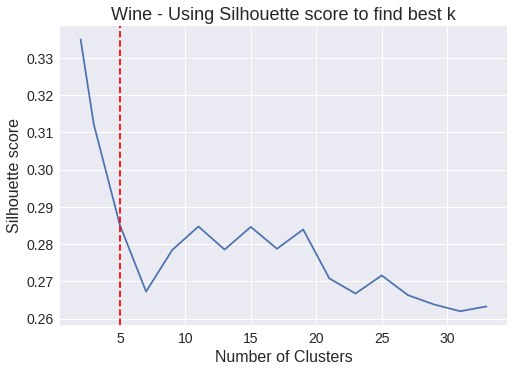

In [365]:
cluster_range = [2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33]
#mean squared distance between each instance and its closest centroid. Also called inertia
silhouette_list = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=10)
    c_labels = c.fit(X_train)
    silhouette_list.append(silhouette_score(X_train, c.labels_))
plt.style.use('seaborn')
plt.plot([2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33],silhouette_list)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Silhouette score', fontsize = 16)
plt.title('Wine - Using Silhouette score to find best k', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.33497057112306633
For n_clusters = 3 The average silhouette_score is : 0.3122660257763737
For n_clusters = 4 The average silhouette_score is : 0.3069765839123097
For n_clusters = 5 The average silhouette_score is : 0.28509583905333596
For n_clusters = 6 The average silhouette_score is : 0.2808258812163489
For n_clusters = 7 The average silhouette_score is : 0.26723308907450105
For n_clusters = 8 The average silhouette_score is : 0.27654394530581655
For n_clusters = 9 The average silhouette_score is : 0.2784101836360273
For n_clusters = 10 The average silhouette_score is : 0.2850027616847065


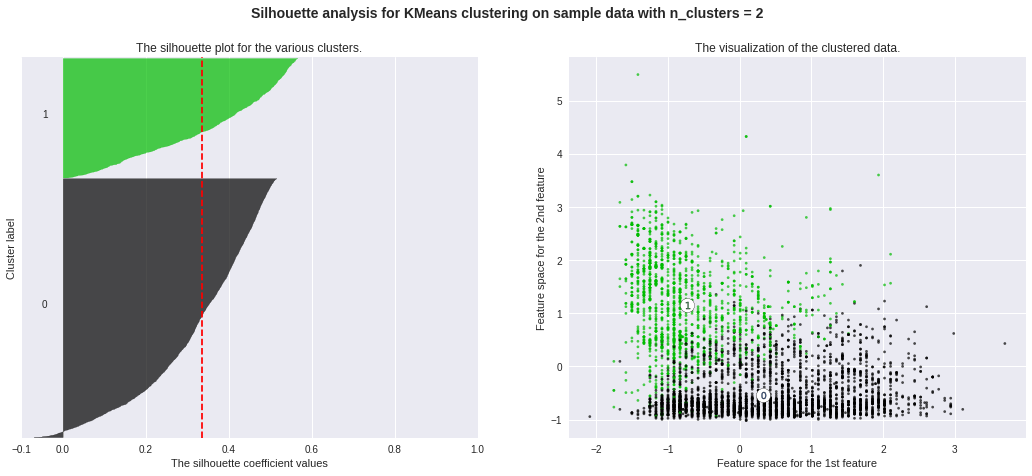

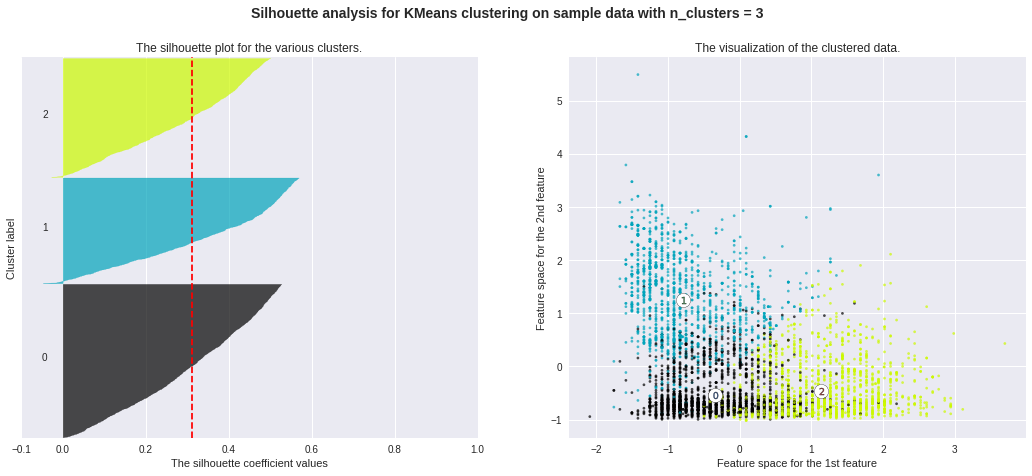

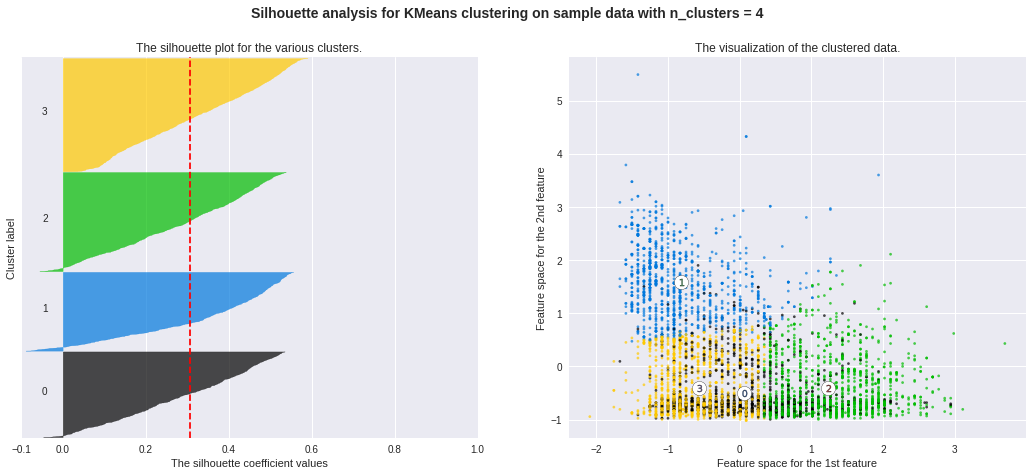

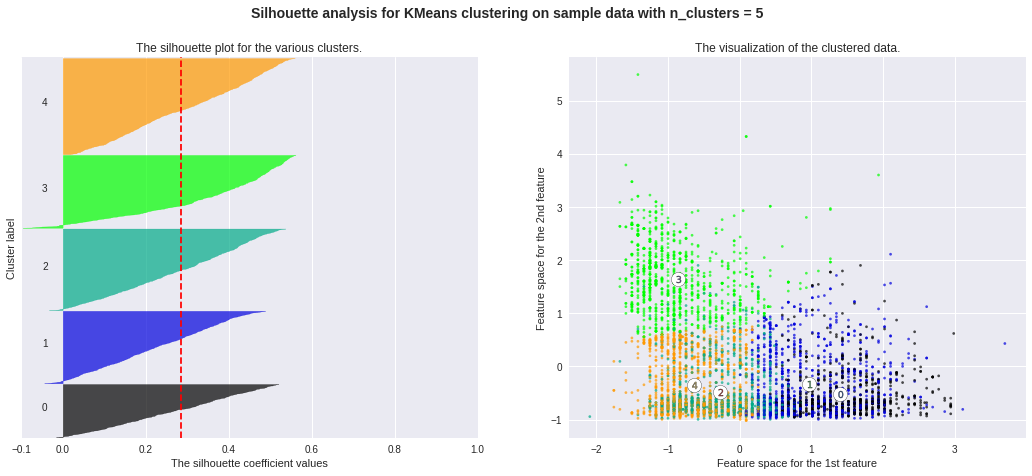

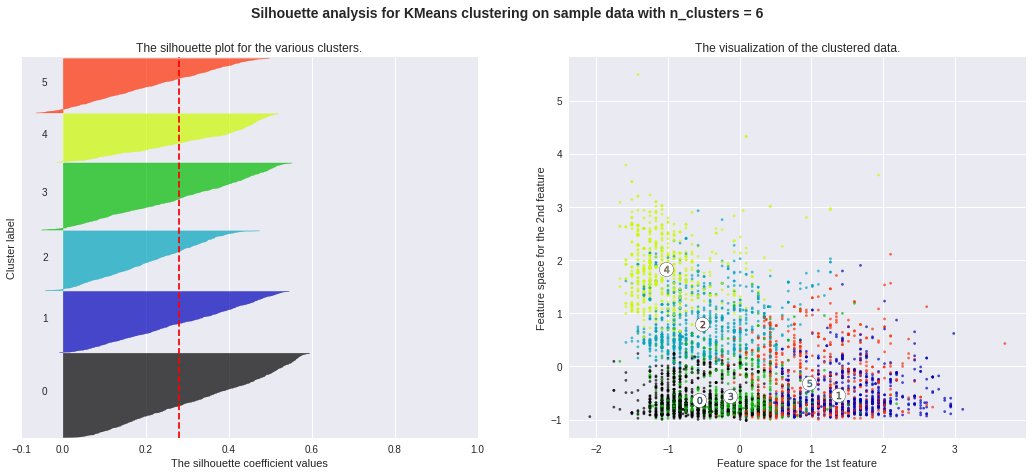

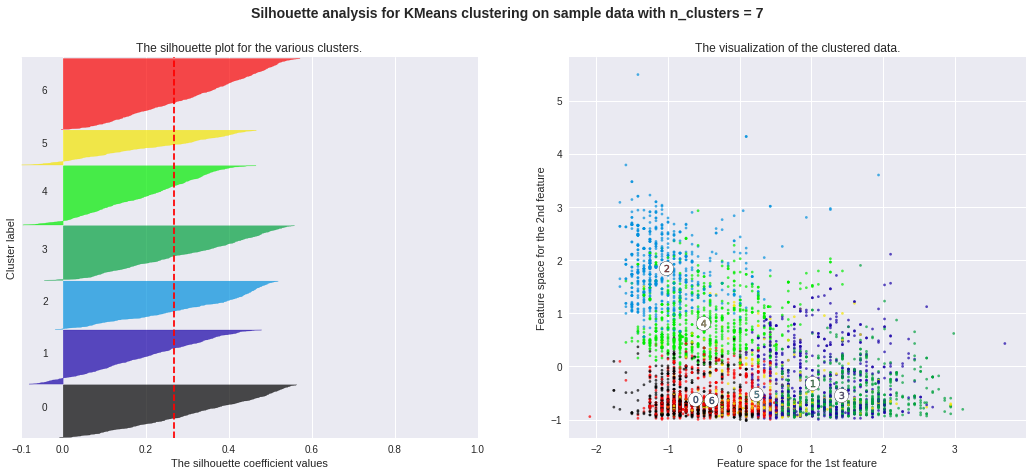

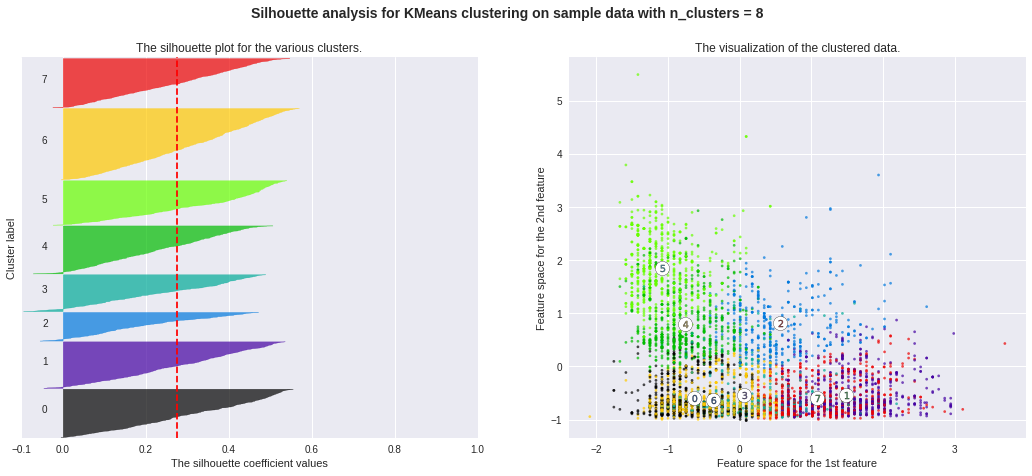

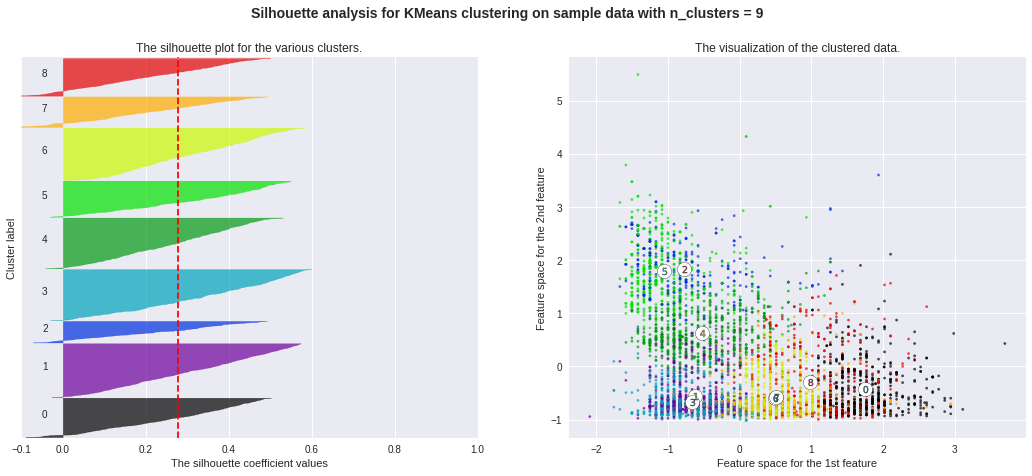

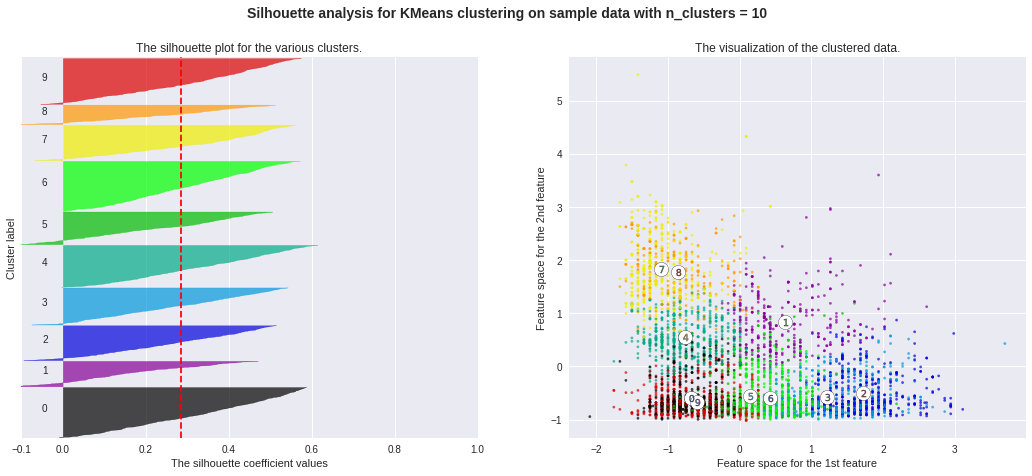

In [366]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)

    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train[:, 0], X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [367]:
cluster_range = [2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]
#mean squared distance between each instance and its closest centroid. Also called inertia
bic_main = []
bic_by_cv = []
covariance_type = ['spherical', 'tied', 'diag', 'full']
for cv in covariance_type:
    for num_cluster in cluster_range:
        gmm = GaussianMixture(covariance_type = cv, n_components = num_cluster, n_init = 10,random_state=1)
        c_labels = gmm.fit(X_train)
        bic_by_cv.append(gmm.bic(X_train))
    bic_main.append(bic_by_cv)
    bic_by_cv = []

In [368]:
#covariance_type diag has the smallest bic
[min(i) for i in bic_main]

[38041.563537249494, 36887.02823513867, 35491.542158394856, 35713.68613478997]

AIC for n_clusters(2): [38087.30724854111]
BIC for n_clusters(2): [38172.53312713622]
AIC for n_clusters(3): [38087.30724854111, 36497.262725681205]
BIC for n_clusters(3): [38172.53312713622, 36628.37946198137]
AIC for n_clusters(4): [38087.30724854111, 36497.262725681205, 36144.54545461195]
BIC for n_clusters(4): [38172.53312713622, 36628.37946198137, 36321.55304861718]
AIC for n_clusters(5): [38087.30724854111, 36497.262725681205, 36144.54545461195, 35898.41014797283]
BIC for n_clusters(5): [38172.53312713622, 36628.37946198137, 36321.55304861718, 36121.308599683114]
AIC for n_clusters(6): [38087.30724854111, 36497.262725681205, 36144.54545461195, 35898.41014797283, 35581.824412802875]
BIC for n_clusters(6): [38172.53312713622, 36628.37946198137, 36321.55304861718, 36121.308599683114, 35850.61372221822]
AIC for n_clusters(7): [38087.30724854111, 36497.262725681205, 36144.54545461195, 35898.41014797283, 35581.824412802875, 35384.35287291091]
BIC for n_clusters(7): [38172.53312713622, 

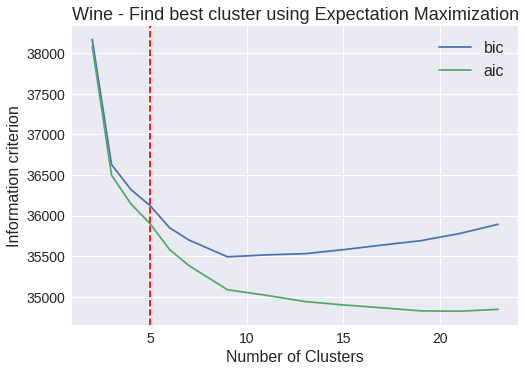

In [369]:
cluster_range = [2,3,4,5,6,7,9,11,13,15,17,19,21,23]
bic = []
aic = []
for num_cluster in cluster_range:
    gmm = GaussianMixture(covariance_type = 'diag', n_components = num_cluster, n_init = 10,random_state=1)
    c_labels = gmm.fit(X_train)
    bic.append(gmm.bic(X_train))
    aic.append(gmm.aic(X_train))
    print('AIC for n_clusters(%s): %s'%(num_cluster, aic))
    print('BIC for n_clusters(%s): %s'%(num_cluster, bic))
    
plt.style.use('seaborn')
plt.plot([2,3,4,5,6,7,9,11,13,15,17,19,21,23],bic,label = 'bic')
plt.plot([2,3,4,5,6,7,9,11,13,15,17,19,21,23],aic,label = 'aic')
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Information criterion', fontsize = 16)
plt.title('Wine - Find best cluster using Expectation Maximization', fontsize = 18)
plt.legend(fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

In [370]:
rows = X_train.shape[0]
y_train2 = y_train.to_numpy()
y_train2 = np.reshape(y_train2,(rows,1))
X_train_vis = np.hstack((X_train,y_train2))

columns = list(df.columns)
columns.append('y')
c = KMeans(n_clusters=3, random_state=10)
c_labels = c.fit_predict(X_train)
df_converted = convert_numarr_to_df(X_train_vis,c_labels,columns)

df_converted.groupby(['class','y']).count()

alcohol  sugar    pH
class y                        
0.0   0.0      965    965   965
      1.0     1144   1144  1144
1.0   0.0      292    292   292
      1.0     1342   1342  1342
2.0   0.0       31     31    31
      1.0     1423   1423  1423

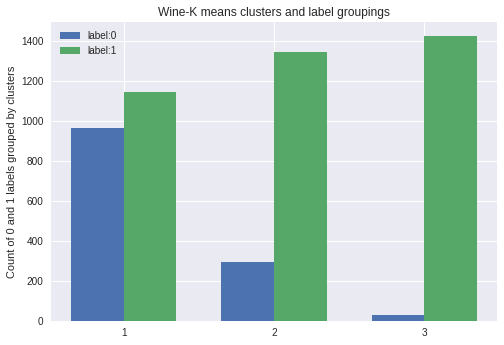

In [371]:
#Wine-kmeans grouping
clusters = ['1', '2', '3']
zero_label = [965, 292, 31]
one_label = [1144, 1342, 1423]

x = np.arange(len(clusters))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, zero_label, width, label='label:0')
rects2 = ax.bar(x + width/2, one_label, width, label='label:1')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of 0 and 1 labels grouped by clusters')
ax.set_title('Wine-K means clusters and label groupings')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

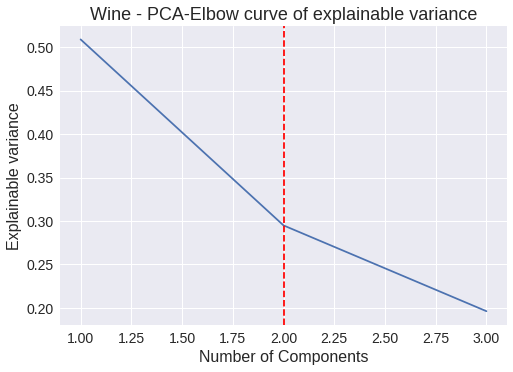

In [372]:
#PCA
n_features = X_train.shape[1]
total_explained_variance = []
pca = PCA(n_components = n_features, random_state = 23)
X_reduced = pca.fit_transform(X_train)
ev = pca.explained_variance_ratio_

plt.style.use('seaborn')
plt.plot(range(1,n_features+1),ev)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Explainable variance', fontsize = 16)
plt.title('Wine - PCA-Elbow curve of explainable variance', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=2,color='r', linestyle='--')
plt.show()

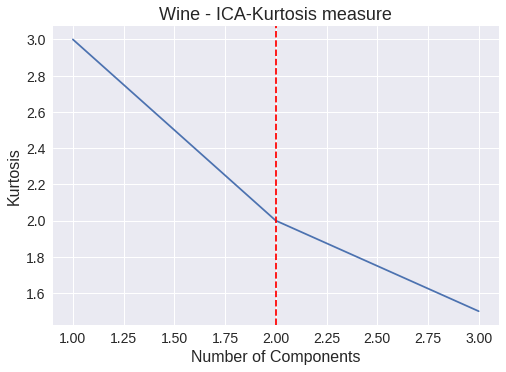

In [373]:
#ICA
n_features = X_train.shape[1]
total_explained_variance = []
kurtosis_avg = []
for feature in range(1,n_features+1):
    ica = FastICA(n_components = feature, random_state = 42,whiten = True)
    X_reduced = ica.fit_transform(X_train)
    kurtosis_col_list = []
    for col in range(X_reduced.shape[1]):
        kurtosis_col_list.append(kurtosis(X_reduced[col]))
    kurtosis_avg.append(np.abs(np.mean(kurtosis_col_list)))

plt.style.use('seaborn')
plt.plot(range(1,n_features+1),kurtosis_avg)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Kurtosis', fontsize = 16)
plt.title('Wine - ICA-Kurtosis measure', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=2,color='r', linestyle='--')
plt.show()

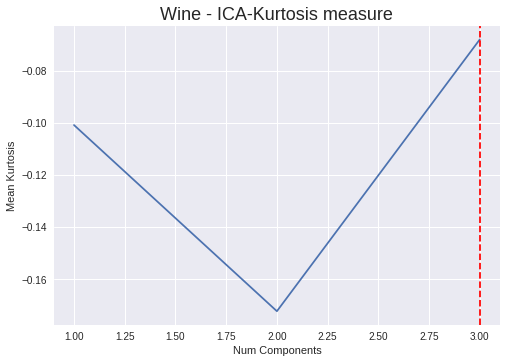

In [374]:
#ICA
n_features = X_train.shape[1]
ica_df = []
for i in range(1,n_features+1):
    ica = FastICA(i, max_iter=4000, whiten=True, tol=0.001)
    ica.fit(X_train)
    X_projected = ica.transform(X_train)
    reconstruction = np.dot(X_projected, ica.mixing_.T)
    loss = np.sum((X_train - reconstruction) ** 2)
    ica_df.append([i, np.mean(kurtosis(ica.transform(X_train))), loss])
ica_df = pd.DataFrame(ica_df, columns=["Num Components", "Mean Kurtosis", "Reconstruction Error"])
ica_df

sns.lineplot(data=ica_df, x="Num Components", y="Mean Kurtosis")
plt.title('Wine - ICA-Kurtosis measure', fontsize = 18)
plt.axvline(x=3,color='r', linestyle='--')

Text(0.5, 1.0, 'Credit - RandomProjection-Reconstruction error measure')

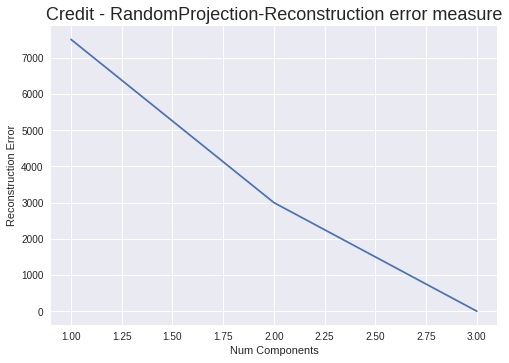

In [375]:
sns.lineplot(data=ica_df, x="Num Components", y="Reconstruction Error")
plt.title('Credit - RandomProjection-Reconstruction error measure', fontsize = 18)

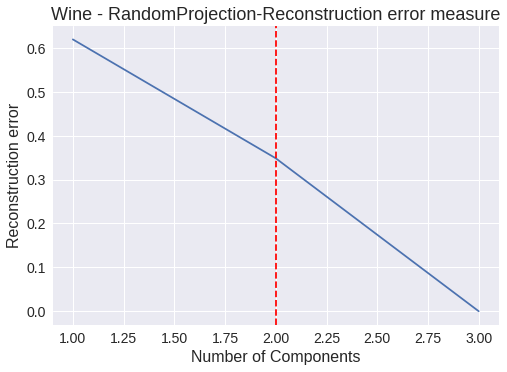

[0.6194179000568685, 0.34848663414300957, 6.019355434744689e-30]


In [376]:
#randomized projection
n_features = X_train.shape[1]
error_list = []
for feature in range(1,n_features+1):
    transformer = random_projection.GaussianRandomProjection(n_components=feature,random_state=55)
    X_new = transformer.fit_transform(X_train)
    W = transformer.components_
    p = pinv(W)
    reconstructed_matrix = ((p.dot(W)).dot(X_train.T)).T
    error = np.mean(np.square(reconstructed_matrix-X_train))
    error_list.append(error)
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),error_list)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Reconstruction error', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Wine - RandomProjection-Reconstruction error measure', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=2,color='r', linestyle='--')
plt.show()
print(error_list)

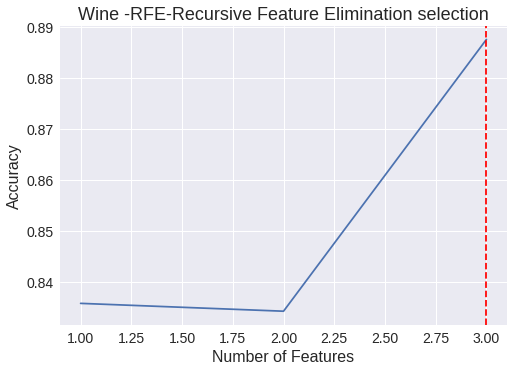

In [377]:
#recursive feature selection RFE
#dim reduction using labels
n_features = X_train.shape[1]
y_train=y_train.astype('int')
accuracy_list = []
for feature in range(1,n_features+1):
    selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=feature)
    selector = selector.fit(X_train, y_train)
    X_reduced = X_train[:,selector.support_]
    rf = RandomForestClassifier(random_state=42)
    mean_accuracy = np.mean(cross_val_score(rf, X_reduced, y_train, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise'))
    accuracy_list.append(mean_accuracy)
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),accuracy_list)
plt.xlabel('Number of Features', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Wine -RFE-Recursive Feature Elimination selection', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(0.75,0.81)
plt.axvline(x=3,color='r', linestyle='--')
plt.show()